In [24]:
import dlib                     # detection and recognition
import cv2                      # image
import numpy as np              # matrix
import matplotlib.pyplot as plt #visualization
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects

In [25]:
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor('models/shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('models/dlib_face_recognition_resnet_model_v1.dat')

In [26]:
def face_find(images):
    dets = detector(images, 1)
    
    if len(dets) == 0:
        return np.empty(0), np.empty(0), np.empty(0)
    
    rects, shapes = [], []
    shapes_np = np.zeros((len(dets), 68, 2), dtype = np.int)
    for k, d in enumerate(dets):
        rect = ((d.left(), d.top()), (d.right(), d.bottom()))
        rects.append(rect)
        
        shape = sp(images, d)
        
        for i in range(0, 68):
            shapes_np[k][i] = (shape.part(i).x, shape.part(i).y)
        
        shapes.append(shape)
        
    return rects, shapes, shapes_np

def face_encode(images, shapes):
    face_descriptors = []
    for shape in shapes:
        face_descriptor = facerec.compute_face_descriptor(images, shape)
        face_descriptors.append(np.array(face_descriptor))
        
    return np.array(face_descriptors)

In [27]:
images_paths = {
    'iron' : '/Users/sejongpyo/python_project/face_detection/images/iron.jpg',
    'captain' : '/Users/sejongpyo/python_project/face_detection/images/captain.jpg',
    'thor' : '/Users/sejongpyo/python_project/face_detection/images/thor.jpg',
    'hulk' : '/Users/sejongpyo/python_project/face_detection/images/hulk.jpg'
}

# insert records
descs = {
    'iron' : None,
    'captain' : None,
    'thor' : None,
    'hulk' : None
}

for name, images_path in images_paths.items():
    images_bgr = cv2.imread(images_path) # load image
    images_rgb = cv2.cvtColor(images_bgr, cv2.COLOR_BGR2RGB)
    # convert bgr to rgb which is colored image

    _, images_shapes, _ = face_find(images_rgb)
    descs[name] = face_encode(images_rgb, images_shapes)
    
np.save('images/descs.npy', descs)
print(descs)

{'iron': array([[-0.10454972,  0.13488345,  0.08103213,  0.03116917, -0.06587228,
        -0.08196608, -0.09735055, -0.10109023,  0.16701682, -0.03948342,
         0.26030755, -0.00284192, -0.19923507,  0.01352947, -0.04096292,
         0.1182919 , -0.21184728, -0.01551823, -0.07276471, -0.0786626 ,
         0.05894596,  0.08401538,  0.06967586,  0.05090534, -0.12496835,
        -0.30427352, -0.07741304, -0.07756791,  0.18126114, -0.06686483,
        -0.0508616 , -0.0149072 , -0.1132382 , -0.10765247,  0.02306918,
         0.04474403, -0.09490734, -0.10047211,  0.21388677,  0.08024255,
        -0.1607974 ,  0.02466565,  0.00503618,  0.36174956,  0.20462793,
         0.0850452 ,  0.0638602 , -0.10538292,  0.08478223, -0.27602229,
         0.05761912,  0.13629079,  0.08706221,  0.06426252,  0.11775479,
        -0.2001631 ,  0.00599751,  0.19497517, -0.17589487,  0.14634755,
         0.09827188, -0.03992881,  0.06976327, -0.03645054,  0.26134595,
         0.11230083, -0.13513806, -0.07300

In [28]:
images_bgr = cv2.imread('images/marvel.jpg')
images_rgb = cv2.cvtColor(images_bgr, cv2.COLOR_BGR2RGB)

rects, shapes, _ = face_find(images_rgb)
descriptors = face_encode(images_rgb, shapes)

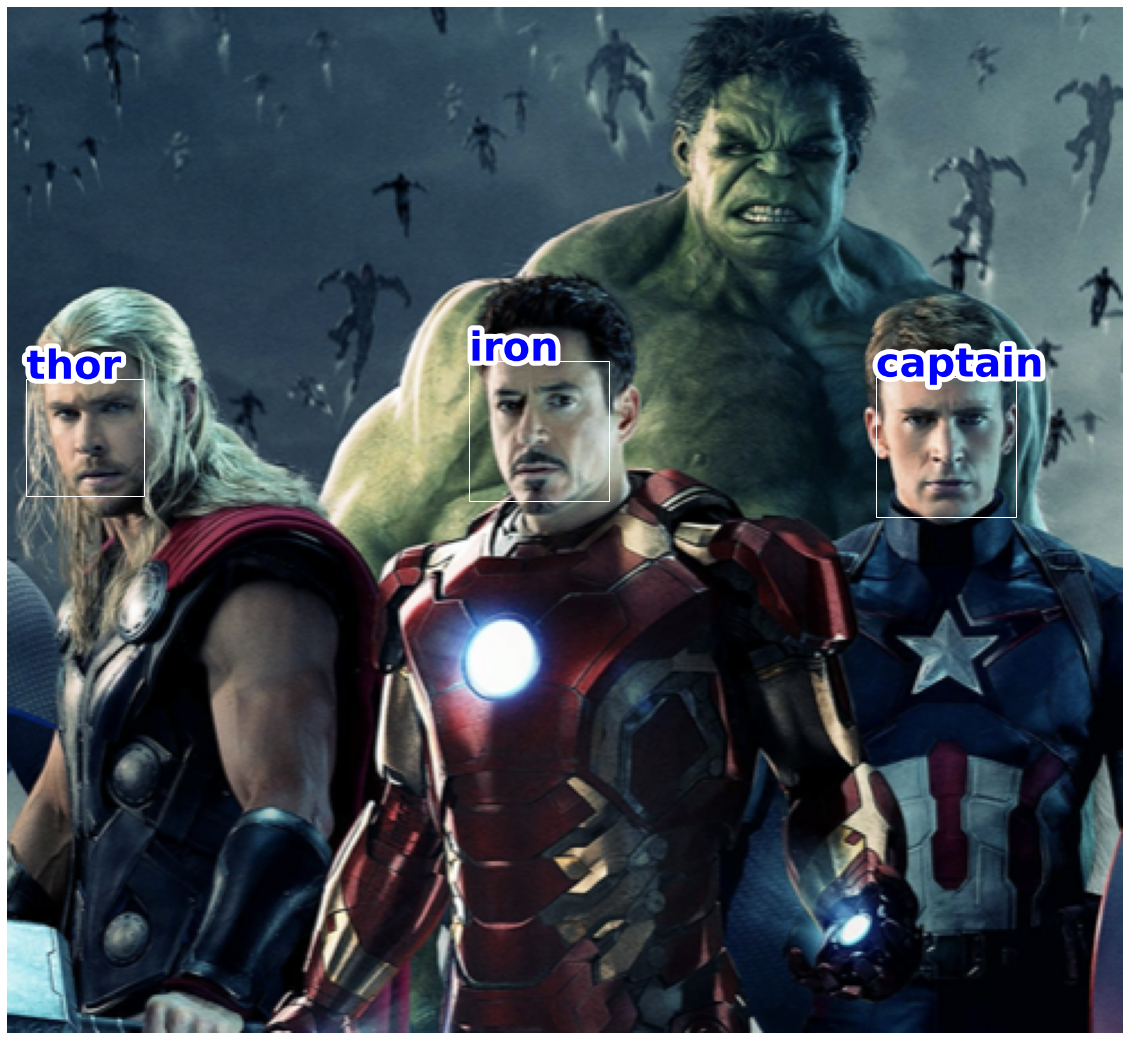

In [29]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(images_rgb)

for i, desc in enumerate(descriptors):
    
    found = False
    for name, saved_desc in descs.items():
        dist = np.linalg.norm([desc] - saved_desc, axis = 1)
        
        if dist < 0.6:
            found = True
            
            text = ax.text(rects[i][0][0], rects[i][0][1], name, color = 'b', fontsize = 40, fontweight = 'bold')
            text.set_path_effects([path_effects.Stroke(linewidth = 10, foreground = 'white'),
                                  path_effects.Normal()])
            rect = patches.Rectangle(rects[i][0],
                                    rects[i][1][1] - rects[i][0][1],
                                    rects[i][1][0] - rects[i][0][0],
                                    edgecolor = 'w',
                                    facecolor = 'none')
            ax.add_patch(rect)
            
            break
            
    if not found:
        ax.text(rects[i][0][0], rects[i][0][1], 'unknown',
                color='r', fontsize=20, fontweight='bold')
        rect = patches.Rectangle(rects[i][0],
                             rects[i][1][1] - rects[i][0][1],
                             rects[i][1][0] - rects[i][0][0],
                             edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.axis('off')
plt.savefig('images/output.png')
plt.show()